<a href="https://colab.research.google.com/github/Ashwin-2408/Tensor_Flow_Learning/blob/main/notebooks/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Introduction to Regression in Neural Networks

Regression mean figuring out the relationship between the independent(output) variable and the dependent variables(input)
It is used to predict the output using the input usually a numerical.


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#data
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#labels
Y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

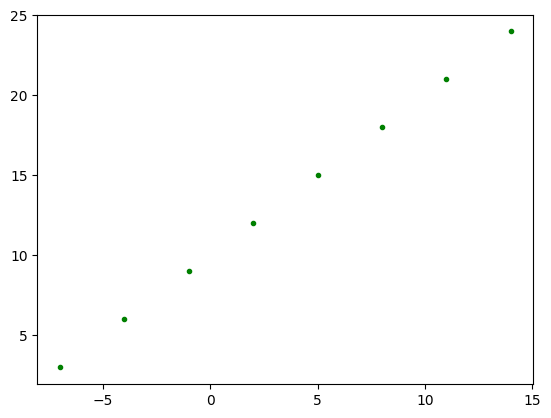

In [ ]:
plt.plot(X,Y,'g.')
plt.show()

In [ ]:
#Relation between X and Y, This is the relationship that we want out neural network to learn
Y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes


In [ ]:
#Creating a demo sensor for house prediction
house_info=tf.constant(["Bedroom","Hall","Bathroom"])
house_price=tf.constant([1920393])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Hall', b'Bathroom'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1920393], dtype=int32)>)

In [ ]:
#converting our numpy data to tensors
X=tf.constant(X)
Y=tf.constant(Y)
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=Y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

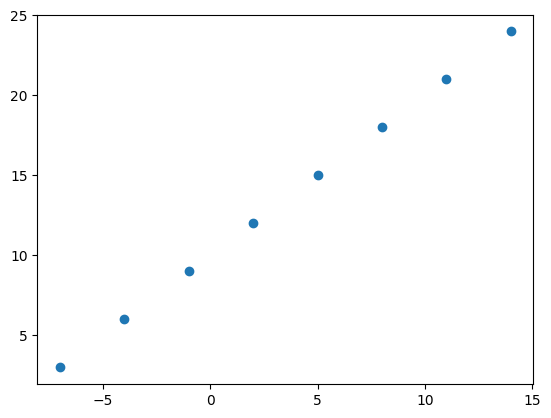

In [ ]:
plt.scatter(X,Y)
plt.show()

##Steps in Modelling with TensorFlow

* Creating the Model:Defining the input,output and hidden layers of out models
* Compiling the model:define the loss function(tells us how wrong our model is),the optimizer(Which tells us how we can improve the patterns it learns),and Evaluation Metrics(what we can use to interpret out model).
*Fitting the model:Letting the model figure out relationships between feautures and labels(input and output)




In [ ]:
#set seed
import random
import numpy as np
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

#Fitting the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step - loss: 9.1572 - mae: 9.1572
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 9.0247 - mae: 9.0247
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 8.8922 - mae: 8.8922
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8.7597 - mae: 8.7597
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 8.6272 - mae: 8.6272


In [ ]:
ypred=model.predict(tf.constant([[17]]))
ypred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[24.118654]], dtype=float32)

The model didnt properly find the relationship

In [ ]:
ypred+8.5

array([[32.618652]], dtype=float32)

##Improving our model
We can improve our model by,altering the steps we took to create a model

* **Creating a Model**-by adding in more layers,increasing the amount of hidden units(neurons) within each layer,changing the activation function

* **Compiling a Model**-We may change the opimization function or change the learning rate

* **Fitting a model**-We may let the model fit for more epochs(let it train longer)


Note:We run the initial model(small) with less input like 20 percent to ensure the model works and then we expand to a bigger model

In [ ]:
#Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics=["mae","mse"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step - loss: 9.3432 - mae: 9.3432 - mse: 88.9590
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.2107 - mae: 9.2107 - mse: 87.1792
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.0782 - mae: 9.0782 - mse: 85.5503
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.9457 - mae: 8.9457 - mse: 84.0722
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.8132 - mae: 8.8132 - mse: 82.7450
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.6807 - mae: 8.6807 - mse: 81.5687
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.5482 - mae: 8.5482 - mse: 80.5433
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.4157 - mae: 8.4157 - mse: 79.6687
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.2832 - mae: 8.2832 - mse: 78.9451
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.1507 - mae: 8.1507 - mse: 78.3722
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss:

Increase the number of epochs made a drastic difference in the outputs

In [ ]:
model.predict(tf.constant([[10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[17.914124]], dtype=float32)

In [ ]:
model.predict(tf.constant([[6]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[11.063474]], dtype=float32)

Increasing a layer and changing the optimizer gave much better results along with an increase in epochs

In [ ]:
#Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics=["mae","mse"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.6270 - mae: 12.6270 - mse: 195.8839
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.5325 - mae: 12.5325 - mse: 192.8841
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 12.4373 - mae: 12.4373 - mse: 189.8887
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.3424 - mae: 12.3424 - mse: 186.9240
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.2476 - mae: 12.2476 - mse: 183.9913
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.1533 - mae: 12.1533 - mse: 181.1028
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.0589 - mae: 12.0589 - mse: 178.2361
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.9643 - mae: 11.9643 - mse: 175.3905
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.8696 - mae: 11.8696 - mse: 172.5658
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.7746 - mae: 11.7746 - mse: 169.7617
Epoch 11/100
1/1 ━━━━━━━━━━━━━━

In [ ]:
model.predict(tf.constant([[10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[19.502651]], dtype=float32)

In [ ]:
model.predict(tf.constant([[-2]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1.2485639]], dtype=float32)

In [ ]:
#Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics=["mae","mse"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - loss: 13.0215 - mae: 13.0215 - mse: 207.1463
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.4108 - mae: 12.4108 - mse: 185.6058
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.7951 - mae: 11.7951 - mse: 165.3284
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.1787 - mae: 11.1787 - mse: 146.3873
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.5579 - mae: 10.5579 - mse: 128.7625
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 9.9301 - mae: 9.9301 - mse: 112.1953
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.2659 - mae: 9.2659 - mse: 96.3036
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.5651 - mae: 8.5651 - mse: 81.2563
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.8231 - mae: 7.8231 - mse: 67.2313
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.0424 - mae: 7.0424 - mse: 54.5977
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [ ]:
model.predict(tf.constant([[10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[18.68288]], dtype=float32)

Increasing the learning rate improved the model acccuracy soo much

In [ ]:
#Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae","mse"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.3487 - mae: 14.3487 - mse: 266.9743
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.5952 - mae: 13.5952 - mse: 242.4703
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.8375 - mae: 12.8375 - mse: 219.3227
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.1301 - mae: 12.1301 - mse: 197.7392
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.6181 - mae: 11.6181 - mse: 177.8133
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.0935 - mae: 11.0935 - mse: 159.0198
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.5579 - mae: 10.5579 - mse: 141.3029
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.0167 - mae: 10.0167 - mse: 124.8120
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.4582 - mae: 9.4582 - mse: 109.1824
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 8.8763 - mae: 8.8763 - mse: 94.3162
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model.predict(tf.constant([[10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[20.283913]], dtype=float32)

##Evaluating Our Model
Typical Workflow while building neural networks

create a model -> fit a model -> evaluate the model -> tweak the model -> create a model -> fit the model -> evaluate the model -> tweak the model .....

When it comes to evaluating a model we must visualize..


*   The data - what does our data look like? What data are we working with?
*   The Model - what does our model look like?
*   Training of a model -how does a model perform while it learns
*   Predictions of the model - how does the predictions of the model line up with the original data



###Visualizing Data


In [ ]:
#Creating a bigger dataset
import tensorflow as tf
X=tf.range(-50,50,2)
Y=X+10
X,Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-50, -48, -46, -44, -42, -40, -38, -36, -34, -32, -30, -28, -26,
        -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,   0,
          2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-40, -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16,
        -14, -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,
         12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,
         38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58], dtype=int32)>)

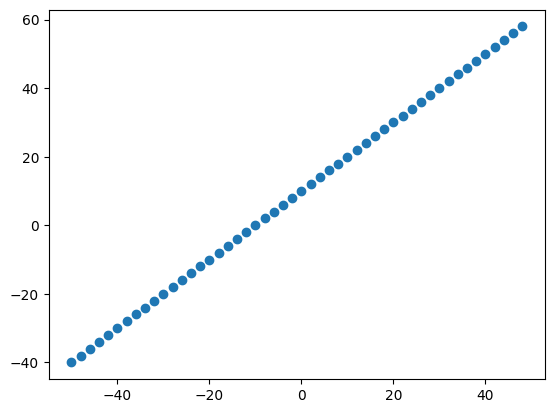

In [ ]:
#Plotting the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

### Three datasets


1.   Training set - this consists of 70% to 80%  and the model learns from this data
2.   Validation set -The model gets tuned on this data which consists of 10% to 15 %
3.   Test set- The model gets evaluated on this data , to check what it has learned. This set is 10% to 15%



In [ ]:
len(X)


50

In [ ]:
X_Train=X[:40]
Y_Train=Y[:40]
X_Test=X[40:50]
Y_Test=Y[40:50]

In [ ]:
X_Test,Y_Test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([30, 32, 34, 36, 38, 40, 42, 44, 46, 48], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([40, 42, 44, 46, 48, 50, 52, 54, 56, 58], dtype=int32)>)

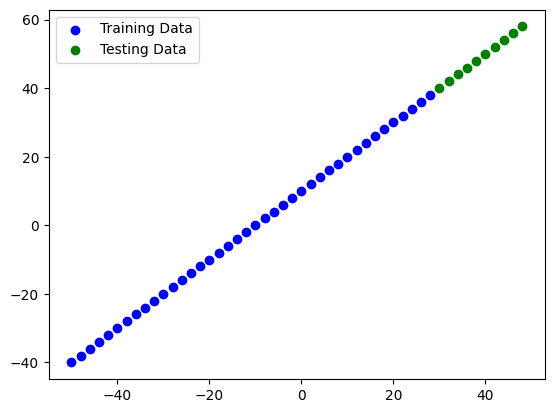

In [ ]:
#visualizing the data
plt.scatter(X_Train,Y_Train,c="b",label="Training Data")
plt.scatter(X_Test,Y_Test,c="g",label="Testing Data")
plt.legend()
plt.show()


In [ ]:
#Create a model
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

###Visualizing the model

The model summary doesnt work until the model if fitted with some data or is ,built using the build() function ,or given an input shape

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

#Create a model
model=tf.keras.Sequential([tf.keras.Input(shape=(1,)),tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X,Y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 34.2921 - mae: 34.2921


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Total paramas** - These are the total parameters of the model

**Trainable params** - These are the parameters or patters than the model updates as it train

Non_Trainable params - These are the parameters which aren't updated during training(this is typical when we bring in learned patterns and parameters from other models) usually in **transfer learning**.


In [ ]:
import tensorflow as tf
bigger_model=tf.keras.Sequential([tf.keras.Input(shape=(1,)),
                                  tf.keras.layers.Dense(100,activation="relu"),
                                  tf.keras.layers.Dense(1)])

bigger_model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

In [ ]:
bigger_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

### Visualizing the Predictions


In [4]:
#Creating data
import numpy as np
import tensorflow as tf
X=np.arange(-100,100,2)
Y=X+5

In [21]:
# splitting the data into train and test datasets
X_train = X[:80]
Y_train=Y[:80]
X_test=X[80:]
Y_test=Y[80:]

X_train,X_test


(array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
         -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
         -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
         -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
         -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
          10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
          32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
          54,   56,   58]),
 (20,))

In [19]:
#Creating a model
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
model=tf.keras.Sequential([tf.keras.layers.Dense(100,input_shape=(1,),activation="relu"),
                           tf.keras.layers.Dense(1,)])
#compiling the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fitting the model

model.fit(X_train,Y_train,epochs=75)

Epoch 1/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 48.7448 - mae: 48.7448
Epoch 2/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32.1389 - mae: 32.1389
Epoch 3/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.8177 - mae: 15.8177
Epoch 4/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4859 - mae: 5.4859
Epoch 5/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.0884 - mae: 11.0884
Epoch 6/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3428 - mae: 9.3428  
Epoch 7/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0306 - mae: 3.0306
Epoch 8/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.8894 - mae: 5.8894
Epoch 9/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.6458 - mae: 6.6458
Epoch 10/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.7467 - mae: 3.7467
Epoch 11/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8357 - mae: 2.8357
Epoch 12/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9448 - mae: 2.9448
Epoch 13/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

In [23]:
ypred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


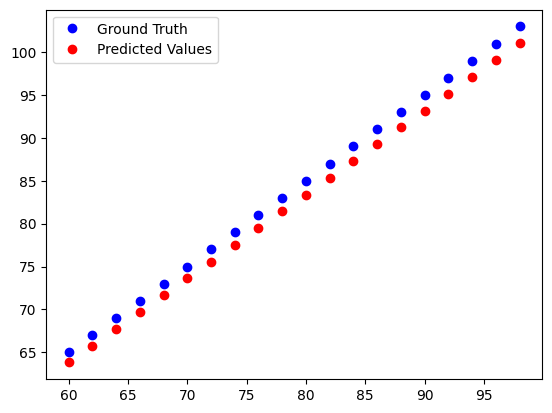

In [27]:
import matplotlib.pyplot as plt
plt.plot(X_test,Y_test,'bo',label="Ground Truth")
plt.plot(X_test,ypred,'ro',label="Predicted Values")
plt.legend()
plt.show()
